In [2]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout 
from keras.optimizers import SGD
from keras.utils import to_categorical

2023-04-04 14:05:31.082278: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 14:05:31.325968: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-04 14:05:31.328521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 14:05:33.354367: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


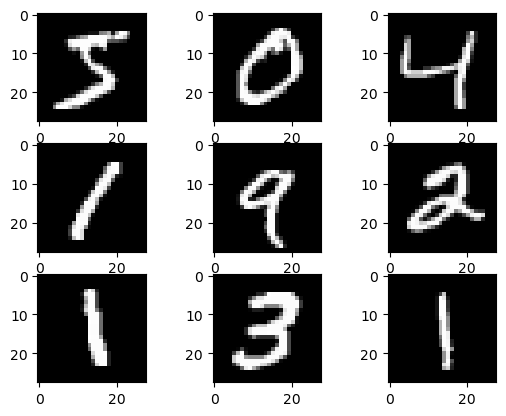

In [3]:
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

for i in range(9):

 plt.subplot(330 + 1 + i)

 plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
# reshape dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

In [5]:
# one hot encode target values
trainY = to_categorical(trainy)
testY = to_categorical(testy)

In [6]:
# normalize to range 0-1
# convert from integers to floats
train_norm = trainX.astype('float32')
test_norm = testX.astype('float32')
# normalize to range 0-1
train_norm = train_norm / 255.0
test_norm = test_norm / 255.0

In [7]:
# Define CNN Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [8]:
# compile model
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
# fit model
model.fit(train_norm, trainY, epochs=5, batch_size=32, validation_data=(test_norm,testY))

2023-04-04 14:05:40.376587: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1872/1875 [============================>.] - ETA: 0s - loss: 0.1681 - accuracy: 0.9491

2023-04-04 14:06:09.094732: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


1875/1875 [==============================] - 30s 15ms/step - loss: 0.1679 - accuracy: 0.9492 - val_loss: 0.0676 - val_accuracy: 0.9780
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.0469 - val_accuracy: 0.9836
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0435 - val_accuracy: 0.9855
Epoch 4/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0255 - accuracy: 0.9920 - val_loss: 0.0408 - val_accuracy: 0.9864
Epoch 5/5
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0170 - accuracy: 0.9952 - val_loss: 0.0400 - val_accuracy: 0.9873


In [10]:
#model train and test scores
model.evaluate(train_norm,trainY),model.evaluate(test_norm,testY)

   5/1875 [..............................] - ETA: 24s - loss: 0.0095 - accuracy: 1.0000 

2023-04-04 14:07:54.894896: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


 21/313 [=>............................] - ETA: 1s - loss: 0.0409 - accuracy: 0.9866

2023-04-04 14:08:06.694913: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 2s 6ms/step - loss: 0.0400 - accuracy: 0.9873


([0.012071932666003704, 0.9971833229064941],
 [0.04003888741135597, 0.9872999787330627])

In [12]:
# model.save('final_model.h5')

In [27]:
# make a prediction for a new image.
import numpy as np
predictions = model.predict(testX, verbose = 0)
print(np.argmax(np.round(predictions[7])))


9


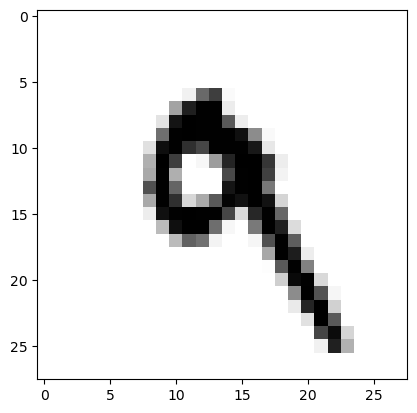

In [26]:
plt.imshow(testX[7].reshape(28,28), cmap = plt.cm.binary)
plt.show()